In [1]:
import pandas as pd

df_a = pd.read_csv("../EasyProblem/min_flow_solution.csv")
df_b = pd.read_csv("../HardProblem/min_flow_solution_cvxpy.csv")

df_a = df_a.rename(columns={"flow": "flow_a"})
df_b = df_b.rename(columns={"flow": "flow_b"})


In [2]:
df = pd.merge(
    df_a[["from", "to", "flow_a"]],
    df_b[["from", "to", "flow_b"]],
    on=["from", "to"],
    how="inner"   # or "outer" if you also want missing pairs
)


In [3]:
df["diff"] = df["flow_b"] - df["flow_a"]
df["abs_diff"] = df["diff"].abs()
df["rel_diff"] = df["diff"] / df["flow_a"].replace(0, pd.NA)  # watch out for 0
df["abs_rel_diff"] = df["rel_diff"].abs()


In [4]:
mae = df["abs_diff"].mean()                # mean absolute error
rmse = (df["diff"]**2).mean()**0.5        # root mean squared error
mape = df["abs_rel_diff"].mean() * 100    # mean abs % error
corr = df["flow_a"].corr(df["flow_b"])    # Pearson correlation


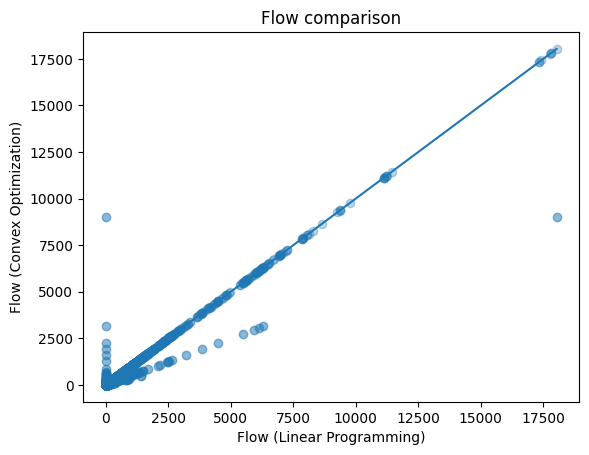

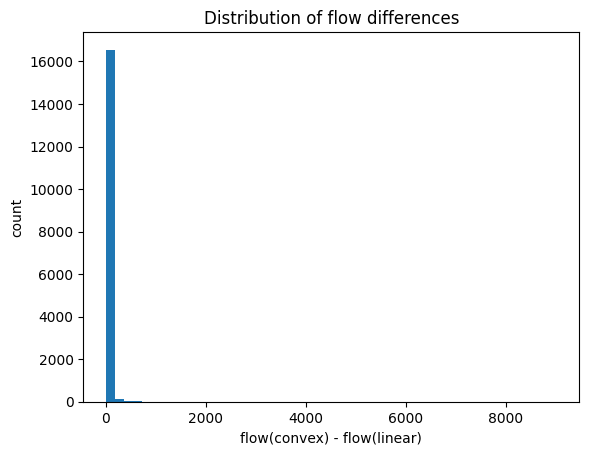

In [7]:
import matplotlib.pyplot as plt

# 1:1 scatter
plt.figure()
plt.scatter(df["flow_a"], df["flow_b"], alpha=0.3)
plt.xlabel("Flow (Linear Programming)")
plt.ylabel("Flow (Convex Optimization)")
plt.title("Flow comparison")
plt.plot([df["flow_a"].min(), df["flow_a"].max()],
         [df["flow_a"].min(), df["flow_a"].max()])
plt.show()

# histogram of differences
plt.figure()
plt.hist(df["abs_diff"], bins=50)
plt.xlabel("flow(convex) - flow(linear)")
plt.ylabel("count")
plt.title("Distribution of flow differences")
plt.show()


In [9]:
threshold = 100

count_exceed = (df["abs_diff"] > threshold).sum()
total_edges = len(df)

percentage = (count_exceed / total_edges) * 100

print("Edges with |flow difference| >", threshold, ":", percentage, "%")


Edges with |flow difference| > 100 : 2.3591087811271296 %


In [12]:
for th in [10, 20, 50, 100, 200, 500, 1000]:
    pct = (df["abs_diff"] > th).mean() * 100
    print(f"Edges with |flow difference| >{th}: {pct:.2f}%")


Edges with |flow difference| >10: 14.39%
Edges with |flow difference| >20: 9.84%
Edges with |flow difference| >50: 4.57%
Edges with |flow difference| >100: 2.36%
Edges with |flow difference| >200: 1.19%
Edges with |flow difference| >500: 0.55%
Edges with |flow difference| >1000: 0.24%
